In [1]:
import pandas
import pandas as pd

from algo1_daypct import *

# 最近大涨的股票
algo = MaxPctDay(5, 40)

stocks = quant_run_select_stocks([algo], 0, 'MaxPctDay1')

for s in stocks:
    print(f'{s[0]:0>6d}', db_id_to_name(s[0]), s[1], db_select_marketval(s[0]))

run day_5_pct_40_mode_1
algo MaxPctDay1_day_5_pct_40_mode_1
quant select date: 2022-01-14 00:00:00

day_5_pct_40_mode_1
found 10 stocks by 9.96 s !
finish
002370 亚太药业 days:5 max pct:46.00 49.905482
002432 九安医疗 days:5 max pct:46.00 360.29235
002550 千红制药 days:5 max pct:47.00 90.99378
002898 赛隆药业 days:5 max pct:46.00 28.952
300094 国联水产 days:5 max pct:68.00 81.650162
300261 雅本化学 days:5 max pct:51.00 263.17615
300501 海顺新材 days:5 max pct:52.00 57.285325
300584 海辰药业 days:5 max pct:62.00 40.632
688075 N安旭 days:5 max pct:41.00 185.693
688767 博拓生物 days:5 max pct:73.00 154.66667


In [ ]:
# 近六日大跌
algo = MaxPctDay(5, -10)

stocks = quant_run_select_stocks([algo], 0, 'MaxPctDay0')

for s in stocks:
    print(f'{s[0]:0>6d}', db_id_to_name(s[0]), s[1], db_select_marketval(s[0]))


In [ ]:
from quant.quant_select_stock_base import *

from algo1_daypct import *

# 股价新高

c0 = MaxPriceDay(60)

stocks = quant_run_select_stocks([c0], 0, 'MaxPriceDay')
print(len(stocks))
for s in stocks:
    mv = db_select_marketval(s[0])
    if mv > 100:
        print(f'{s[0]:0>6d}', db_id_to_name(s[0]), s[1], db_select_marketval(s[0]))


In [ ]:
from quant_select_stock.algo2_macross5 import *

# 均线穿越

f0 = MaCross5()

funcs = [f0]

stocks = quant_run_select_stocks(funcs, 0, f0.desc)

for s in stocks:
    print(f'{s[0]:0>6d}', db_id_to_name(s[0]), s[1], db_select_marketval(s[0]))


In [ ]:
#均线多头



In [ ]:
from quant.quant_select_stock_base import *

from quant_select_stock.algo2_macross import MaSequence

f0 = MaSequence()
f0.ndays = 7

funcs = [f0]

stocks = quant_run_select_stocks(funcs, 0, f0.desc)

for s in stocks:
    print(f'{s[0]:0>6d}', db_id_to_name(s[0]), s[1], db_select_marketval(s[0]))



In [2]:
# rsi 超卖
from quant.quant_select_stock_base import *
from MyTT import *
import numpy as np

np.seterr(divide='ignore', invalid='ignore')


class RsiTriggered(SelectFuncObj):
    def __init__(self):
        super().__init__()
        self.rsi_threshold = 30
        self.desc = f'rsi_{self.rsi_threshold}'

    def run(self, df, stock, dayoffset):
        if df is None:
            return False
        if df.empty or df.shape[0] < 150:
            return False

        try:
            closes = df['close'].dropna()

            rsi = RSI(closes, 10)
            r = rsi[-1]
            r1 = rsi[-2]
            r2 = rsi[-3]
            if r < self.rsi_threshold and r2 > r1 and r > r1:
                self.ret = f'rsi_{r:.2f}'
                return True
        except:
            print(stock)
            return False
        return False

        pass


f0 = RsiTriggered()

funcs = [f0]

stocks = quant_run_select_stocks(funcs, 0, f0.desc)

for s in stocks:
    print(f'{s[0]:0>6d}', db_id_to_name(s[0]), s[1], db_select_marketval(s[0]))



run rsi_30
algo rsi_30_rsi_30
quant select date: 2022-01-14 00:00:00

rsi_30
found 52 in 4612 stocks by 16.92 s !
finish
000720 新能泰山 rsi_25.83 61.774281
000988 华工科技 rsi_26.46 258.01199
002046 国机精工 rsi_28.09 68.112945
002139 拓邦股份 rsi_29.26 199.48242
002201 正威新材 rsi_26.56 88.436347
002544 杰赛科技 rsi_23.40 143.19764
002595 豪迈科技 rsi_26.59 204.8
002667 鞍重股份 rsi_23.56 32.034895
002922 伊戈尔 rsi_29.85 53.574738
003009 中天火箭 rsi_27.88 87.361558
300118 东方日升 rsi_29.62 232.82127
300223 北京君正 rsi_26.76 507.09312
300323 华灿光电 rsi_28.69 142.37914
300454 深信服 rsi_19.34 690.00085
300457 赢合科技 rsi_22.27 174.27104
300474 景嘉微 rsi_23.64 365.10018
300490 华自科技 rsi_25.40 62.909504
300581 晨曦航空 rsi_28.99 70.830389
300617 安靠智电 rsi_23.37 97.606046
300693 盛弘股份 rsi_29.09 67.925661
300712 永福股份 rsi_29.91 90.942738
300861 美畅股份 rsi_27.87 266.16665
600163 中闽能源 rsi_29.08 145.38891
600172 黄河旋风 rsi_27.72 120.710841
600210 紫江企业 rsi_28.58 116.940358
600238 海南椰岛 rsi_23.88 72.87732
600316 洪都航空 rsi_28.34 252.56773
600399 抚顺特钢 rsi_21.54

In [28]:
# rsi 小于50 均线多头
from quant.quant_select_stock_base import *
from MyTT import *
import numpy as np

np.seterr(divide='ignore', invalid='ignore')


class Rsi50Ma(SelectFuncObj):
    def __init__(self):
        super().__init__()
        self.rsi_threshold = 55
        self.desc = f'rsi_{self.rsi_threshold}'

    def run(self, df, stock, dayoffset):
        if df is None:
            return False
        if df.empty or df.shape[0] < 150:
            return False

        try:
            closes = df['close'].dropna()
            close = closes.values[-1]
            rsi = RSI(closes, 6)
            r = rsi[-1]

            ma5 = MA(closes, 5)
            ma10 = MA(closes, 10)
            ma20 = MA(closes, 20)
            ma30 = MA(closes, 30)
            mat = ma30[-1] <= ma20[-1] <= ma10[-1] <= ma5[-1]

            if r < self.rsi_threshold and close > ma5[-1] and mat:
                self.ret = f'rsi_{r:.2f}'
                return True
        except Exception as e:
            print(stock, e)
            raise e
            return False
        return False

        pass


f0 = Rsi50Ma()

funcs = [f0]

stocks = quant_run_select_stocks(funcs, 0, f0.desc)

for s in stocks:
    print(f'{s[0]:0>6d}', db_id_to_name(s[0]), s[1], db_select_marketval(s[0]))





run rsi_55
algo rsi_55_rsi_55
quant select date: 2022-01-06 00:00:00

rsi_55
found 12 stocks by 15.84 s !
finish
000860 顺鑫农业 rsi_53.68 291.21772
002958 青农商行 rsi_54.06 215.00177
300177 中海达 rsi_54.51 71.812315
300250 初灵信息 rsi_53.51 28.994669
300298 三诺生物 rsi_53.61 171.06828
300738 奥飞数据 rsi_54.01 86.480679
600048 保利发展 rsi_54.61 1856.5637
600101 明星电力 rsi_54.14 31.73388
600475 华光环能 rsi_54.86 86.201608
600505 西昌电力 rsi_54.71 36.857774
601952 苏垦农发 rsi_54.28 171.6988
603721 中广天择 rsi_54.91 20.774


In [4]:
# 股价突破60日均线

from quant.quant_select_stock_base import *
from MyTT import *
import numpy as np

np.seterr(divide='ignore', invalid='ignore')


class Ma60Triggered(SelectFuncObj):
    def __init__(self):
        super().__init__()

        self.desc = f'ma60trigger'

    def run(self, df, stock, dayoffset):
        if df is None:
            return False
        if df.empty or df.shape[0] < 65:
            return False

        try:
            closes = df['close'].dropna()
            lows = df['low'].dropna()
            low = lows.values[-1]
            close = closes.values[-1]
            ma60 = MA(closes, 60)

            ma = ma60[-1]
            rsi = RSI(closes, 10)
            r = rsi[-1]

            bma = closes.values[-5:-1] < ma60[-5:-1]
            #print(low, close, ma, r)
            if low < ma and close > ma and all(bma):
                self.ret = f'ma60_{ma}_rsi_{r}'
                return True
        except Exception as ex:
            print(stock, ex)
            raise RuntimeError()
            return False
        return False

        pass


f0 = Ma60Triggered()

funcs = [f0]

stocks = quant_run_select_stocks(funcs, 0, f0.desc)

for s in stocks:
    print(f'{s[0]:0>6d}', db_id_to_name(s[0]), s[1], db_select_marketval(s[0]))



run ma60trigger
algo ma60trigger_ma60trigger
quant select date: 2022-01-14 00:00:00

ma60trigger
found 27 stocks by 18.28 s !
finish
000567 海德股份 ma60_18.184833333333337_rsi_61.989 121.431713
002049 紫光国微 ma60_213.9188333333333_rsi_54.579 1321.99479
002092 中泰化学 ma60_10.018166666666668_rsi_76.866 275.08898
002245 蔚蓝锂芯 ma60_26.640666666666664_rsi_57.511 281.32913
002472 双环传动 ma60_28.032333333333334_rsi_56.632 221.71988
002643 万润股份 ma60_22.736_rsi_50.759 212.39553
002953 日丰股份 ma60_17.403333333333332_rsi_55.056 42.372939
300109 新开源 ma60_21.543166666666664_rsi_54.749 75.905433
300149 睿智医药 ma60_14.203000000000001_rsi_77.999 83.362786
300496 中科创达 ma60_143.0341666666667_rsi_61.649 637.11476
300745 欣锐科技 ma60_63.723333333333336_rsi_53.942 83.336125
300769 德方纳米 ma60_565.3168333333334_rsi_62.514 509.49328
300953 震裕科技 ma60_138.15733333333336_rsi_59.651 129.3812
300969 恒帅股份 ma60_126.41333333333334_rsi_68.959 102.8
301065 本立科技 ma60_54.18283333333333_rsi_65.251 41.616384
600275 *ST昌鱼 ma60_2.804666666666

In [ ]:
# 股价新高 均线多头

from quant.quant_select_stock_base import *
from MyTT import *
import numpy as np

np.seterr(divide='ignore', invalid='ignore')


class NewHighPrice(SelectFuncObj):
    def __init__(self, n=60):
        super().__init__()
        self.ndays = n
        self.desc = f'newhigh{self.ndays}'

    def run(self, df, stock, dayoffset):
        if df is None:
            return False
        if df.empty or df.shape[0] < self.ndays:
            return False

        highs = df['high']
        closes = df['close']

        m = max(highs.values[-self.ndays:-1])
        close = closes.values[-1]
        if close >= m:
            close60 = closes.values[-80:]
            ma5 = MA(close60, 5)
            ma10 = MA(close60, 10)
            ma20 = MA(close60, 20)
            ma30 = MA(close60, 60)
            if ma30[-1] <= ma20[-1] <= ma10[-1] <= ma5[-1]:
                self.ret = f'high:{m:.2f} close:{close:.2f}'
                return True
        return False


f0 = NewHighPrice(90)

funcs = [f0]

stocks = quant_run_select_stocks(funcs, 0, f0.desc)

for s in stocks:
    print(f'{s[0]:0>6d}', db_id_to_name(s[0]), s[1], f'mv: {db_select_marketval(s[0]):.1f}')


In [ ]:
# 股价新低

from quant.quant_select_stock_base import *
from MyTT import *
import numpy as np

np.seterr(divide='ignore', invalid='ignore')


class NewLowPrice(SelectFuncObj):
    def __init__(self, n=60):
        super().__init__()
        self.ndays = n
        self.desc = f'newlow{self.ndays}'

    def run(self, df, stock, dayoffset):
        if df is None:
            return False
        if df.empty or df.shape[0] < self.ndays:
            return False

        highs = df['low']
        closes = df['close']

        rsi = RSI(closes, 6)
        r = rsi[-1]

        m = min(highs.values[-self.ndays:-1])
        close = closes.values[-1]
        low = highs.values[-1]
        if close >= m and low <= m and r < 35:
            self.ret = f'low:{m:.2f} close:{close:.2f} rsi:{r:.1f}'
            return True
            # close60 = closes.values[-80:]
            # ma5 = MA(close60, 5)
            # ma10 = MA(close60, 10)
            # ma20 = MA(close60, 20)
            # ma30 = MA(close60, 60)
            # if ma30[-1] <= ma20[-1] <= ma10[-1] <= ma5[-1]:
            #     self.ret = f'high:{m:.2f} close:{close:.2f}'
            #     return True
        return False


f0 = NewLowPrice(120)

funcs = [f0]

stocks = quant_run_select_stocks(funcs, 0, f0.desc)

for s in stocks:
    print(f'{s[0]:0>6d}', db_id_to_name(s[0]), s[1], f'mv: {db_select_marketval(s[0]):.1f}')


In [2]:
# 双均线穿越


from quant.quant_select_stock_base import *
from MyTT import *
import numpy as np

np.seterr(divide='ignore', invalid='ignore')


class CrossFun(SelectFuncObj):
    def __init__(self, n=60):
        super().__init__()
        self.ma0 = 10
        self.ma1 = 60
        self.desc = f'cross{self.ma0}_{self.ma1}'

    def run(self, df, stock, dayoffset):
        if df is None:
            return False
        if df.empty or df.shape[0] < self.ma1:
            return False

        ma0 = MA(df['close'], self.ma0)
        ma1 = MA(df['close'], self.ma1)

        cr = CROSS(ma0, ma1)
        if cr[-1]:
            self.ret = f'ma0:{ma0[-1]:.2f} ma1:{ma1[-1]:.2f}'
            return True

        return False


f0 = CrossFun()

funcs = [f0]

stocks = quant_run_select_stocks(funcs, 0, f0.desc)

for s in stocks:
    print(f'{s[0]:0>6d}', db_id_to_name(s[0]), s[1], f'mv: {db_select_marketval(s[0]):.1f}')


run cross10_60
algo cross10_60_cross10_60
quant select date: 2022-01-07 00:00:00

cross10_60
found 32 stocks by 11.57 s !
finish
000089 深圳机场 ma0:7.32 ma1:7.31 mv: 151.3
000488 晨鸣纸业 ma0:7.26 ma1:7.23 mv: 220.5
000509 *ST华塑 ma0:3.04 ma1:3.00 mv: 37.9
000629 攀钢钒钛 ma0:3.87 ma1:3.82 mv: 377.1
000708 中信特钢 ma0:20.21 ma1:20.05 mv: 1162.9
002049 紫光国微 ma0:213.52 ma1:213.51 mv: 1280.3
002627 三峡旅游 ma0:5.53 ma1:5.49 mv: 43.0
002774 快意电梯 ma0:8.37 ma1:8.35 mv: 29.2
002866 传艺科技 ma0:12.47 ma1:12.47 mv: 36.3
002980 华盛昌 ma0:30.31 ma1:30.22 mv: 40.9
300047 天源迪科 ma0:7.91 ma1:7.90 mv: 51.3
300420 五洋停车 ma0:3.74 ma1:3.73 mv: 44.0
300463 迈克生物 ma0:28.77 ma1:28.72 mv: 172.4
300529 健帆生物 ma0:52.48 ma1:52.42 mv: 434.4
300639 凯普生物 ma0:28.64 ma1:28.51 mv: 88.2
600015 华夏银行 ma0:5.62 ma1:5.62 mv: 877.1
600026 中远海能 ma0:5.86 ma1:5.83 mv: 285.3
600133 东湖高新 ma0:5.42 ma1:5.42 mv: 43.7
600297 广汇汽车 ma0:2.69 ma1:2.67 mv: 223.1
600461 洪城环境 ma0:8.27 ma1:8.22 mv: 81.7
600498 烽火通信 ma0:17.84 ma1:17.82 mv: 213.0
600688 上海石化 ma0:4.23 

In [1]:
#成交量监控


from quant.quant_select_stock_base import *
from MyTT import *
import numpy as np

np.seterr(divide='ignore', invalid='ignore')


class VolumeInc(SelectFuncObj):
    def __init__(self, n=60):
        super().__init__()
        self.vthreshold = 3
        self.pctthreshold = 5
        self.desc = f'volinc{self.vthreshold}_{self.pctthreshold}'

    def run(self, df, stock, dayoffset):
        if df is None:
            return False
        if df.empty or df.shape[0] < 2:
            return False
        #vols = df['volume']
        turns = df['turn'].values
        pcts = df['pctChg'].values

        vrate = turns[-1]/turns[-2]
        pctret = pcts[-1]

        pe = db_select_pe(stock)

        if pctret > self.pctthreshold and vrate> self.vthreshold and turns[-1]<30 and pe<80:
            self.ret = f'pct:{pctret:.2f} vrate:{vrate:.2f}'
            return True
        return False

f0 = VolumeInc()

funcs = [f0]

stocks = quant_run_select_stocks(funcs, 0, f0.desc)

for s in stocks:
    print(f'{s[0]:0>6d}', db_id_to_name(s[0]), s[1], f'mv: {db_select_marketval(s[0]):.1f}')





run volinc3_5
algo volinc3_5_volinc3_5
quant select date: 2022-01-14 00:00:00

volinc3_5
found 30 in 4612 stocks by 17.14 s !
finish
000419 通程控股 pct:10.11 vrate:16.96 mv: 28.4
000566 海南海药 pct:7.44 vrate:3.34 mv: 71.2
000567 海德股份 pct:5.87 vrate:3.02 mv: 121.4
000652 泰达股份 pct:6.86 vrate:7.35 mv: 68.9
000836 富通信息 pct:5.47 vrate:3.37 mv: 39.6
002196 方正电机 pct:7.10 vrate:3.60 mv: 61.0
002314 南山控股 pct:10.03 vrate:4.80 mv: 98.0
002399 海普瑞 pct:5.25 vrate:3.92 mv: 261.9
002530 金财互联 pct:9.97 vrate:3.65 mv: 62.7
002701 奥瑞金 pct:5.38 vrate:4.38 mv: 167.7
002702 海欣食品 pct:10.04 vrate:3.92 mv: 39.5
002838 道恩股份 pct:7.21 vrate:3.83 mv: 72.4
300182 捷成股份 pct:20.03 vrate:3.28 mv: 180.5
300232 洲明科技 pct:6.37 vrate:3.21 mv: 107.8
300296 利亚德 pct:7.07 vrate:3.78 mv: 277.4
300313 ST天山 pct:8.17 vrate:4.56 mv: 26.1
300658 延江股份 pct:6.35 vrate:4.40 mv: 27.4
301009 可靠股份 pct:5.04 vrate:3.81 mv: 54.9
600267 海正药业 pct:10.00 vrate:5.40 mv: 180.2
600692 亚通股份 pct:5.11 vrate:7.40 mv: 23.1
603319 湘油泵 pct:10.01 vrate:3.90 mv: 4

In [8]:
# 均线多头 回踩十日线

from quant.quant_select_stock_base import *
from MyTT import *
import numpy as np

np.seterr(divide='ignore', invalid='ignore')


class MaInc10(SelectFuncObj):
    def __init__(self, n=60):
        super().__init__()
        self.ma0 = 10
        self.desc = f'mainc{self.ma0}'

    def run(self, df, stock, dayoffset):
        if df is None:
            return False
        if df.empty or df.shape[0] < self.ma0:
            return False

        close = df['close'].values[-1]
        low = df['low'].values[-1]

        pct = df['pctChg'].values[-1]

        ma0 = MA(df['close'], self.ma0)
        ma5 = MA(df['close'], 5)
        ma10 = MA(df['close'], 10)
        ma20 = MA(df['close'], 20)
        ma30 = MA(df['close'], 30)
        inc5 = ma5[-6:] > ma10[-6:]

        m = ma5[-1] < ma5[-2]

        inc = ma5[-2] >= ma10[-2] >= ma20[-2] >= ma30[-2]
        if low < ma10[-1] * 0.99 and low > ma20[-1] and close > ma10[-1]
            and inc and all(inc5) and m and -3 < pct < 3:
        self.ret = f'ma:{ma10[-1]:.2f} low:{low:.2f}'
        return True

    return False


f0 = MaInc10()

funcs = [f0]

stocks = quant_run_select_stocks(funcs, 0, f0.desc)

for s in stocks:
    print(f'{s[0]:0>6d}', db_id_to_name(s[0]), s[1], f'mv: {db_select_marketval(s[0]):.1f}')



run mainc10
algo mainc10_mainc10
quant select date: 2022-01-10 00:00:00

mainc10
found 32 stocks by 14.13 s !
finish
000035 中国天楹 ma:5.94 low:5.87 mv: 150.7
000976 华铁股份 ma:5.42 low:5.36 mv: 87.4
002033 丽江股份 ma:6.21 low:6.12 mv: 34.2
002374 中锐股份 ma:9.50 low:8.90 mv: 103.4
002424 贵州百灵 ma:7.29 low:7.18 mv: 103.3
002435 长江健康 ma:5.23 low:5.16 mv: 64.9
002530 金财互联 ma:6.69 low:6.46 mv: 52.4
002749 国光股份 ma:9.97 low:9.81 mv: 43.4
002990 盛视科技 ma:32.55 low:31.50 mv: 84.7
003017 大洋生物 ma:39.35 low:38.41 mv: 23.9
300078 思创医惠 ma:7.26 low:7.15 mv: 63.7
300434 金石亚药 ma:10.38 low:10.14 mv: 41.9
300451 创业慧康 ma:10.39 low:10.28 mv: 163.5
300493 润欣科技 ma:7.84 low:7.73 mv: 38.4
300571 平治信息 ma:58.74 low:56.77 mv: 82.4
300683 海特生物 ma:56.89 low:56.00 mv: 70.7
300799 左江科技 ma:84.64 low:80.00 mv: 88.8
300859 *ST西域 ma:21.40 low:20.79 mv: 33.3
600106 重庆路桥 ma:4.64 low:4.59 mv: 61.9
600255 鑫科材料 ma:2.91 low:2.84 mv: 53.8
600273 嘉化能源 ma:11.26 low:11.09 mv: 162.2
600343 航天动力 ma:12.33 low:12.01 mv: 79.1
600624 复旦复华 ma:6.80 l

In [1]:
# rsip

from quant.quant_select_stock_base import *
from MyTT import *
import numpy as np

np.seterr(divide='ignore', invalid='ignore')


class RSIPtrigger(SelectFuncObj):
    def __init__(self, n=60):
        super().__init__()
        self.desc = f'rsiptrigger'

    def run(self, df, stock, dayoffset):
        if df is None:
            return False
        if df.empty or df.shape[0] < 60:
            return False

        close = df['close'].values[-1]
        low = df['low'].values
        rsip = RSIP(df)

        comp = low[-6:] < rsip[-6:]

        if (not any(comp[:-1])) and comp[-1] and close > rsip[-1]:
            self.ret = f'rsip:{rsip[-1]:.2f} low:{low[-1]:.2f}'
            return True

        return False


f0 = RSIPtrigger()

funcs = [f0]

stocks = quant_run_select_stocks(funcs, 0, f0.desc)

for s in stocks:
    print(f'{s[0]:0>6d}', db_id_to_name(s[0]), s[1], f'mv: {db_select_marketval(s[0]):.1f}')


run rsiptrigger
algo rsiptrigger_rsiptrigger
quant select date: 2022-01-12 00:00:00

rsiptrigger
found 10 stocks by 13.27 s !
finish
000596 古井贡酒 rsip:221.79 low:219.80 mv: 1176.2
000663 永安林业 rsip:8.56 low:8.55 mv: 29.8
002221 东华能源 rsip:11.96 low:11.91 mv: 198.2
300752 隆利科技 rsip:26.79 low:26.77 mv: 57.4
600171 上海贝岭 rsip:23.53 low:23.22 mv: 169.2
600745 闻泰科技 rsip:118.79 low:117.90 mv: 1489.2
603032 *ST德新 rsip:69.69 low:66.78 mv: 117.6
603985 恒润股份 rsip:44.54 low:43.72 mv: 159.9
688002 睿创微纳 rsip:69.19 low:68.84 mv: 314.2
688390 固德威 rsip:351.43 low:345.50 mv: 316.6


In [112]:
# 连续涨停天数

from quant.quant_select_stock_base import *
from MyTT import *
import numpy as np

np.seterr(divide='ignore', invalid='ignore')

def getctspct(pcts, pth):
    si = -1
    sindex = 0
    nc = 0
    for i, p in enumerate(pcts):
        if si == -1:
            if p >= pth:
                si = i
        elif si >= 0:
            if p >= pth:
                if i == len(pcts) - 1:
                    nc = max(nc, i - si + 1)
                    si = -1
                # 连续涨停
                continue
            else:
                if i - si > nc:
                    sindex = si
                nc = max(nc, i - si)
                si = -1
    return nc, sindex


class Cts10PctDays(SelectFuncObj):
    def __init__(self, n=60):
        super().__init__()
        self.ndays = 30
        self.ncount = 1
        self.desc = f'cts10_{self.ncount}_{self.ndays}'

    def run(self, df, stock, dayoffset):
        if df is None:
            return False
        if df.empty or df.shape[0] < self.ndays:
            return False

        if f'{stock:06}'[0:3] in ['000', '300']:
            pth = 19.95
        else:
            pth = 9.95

        df = df.tail(self.ndays).dropna()

        pcts = df['pctChg'].values
        #计算最大连板次数
        nc, sindex = getctspct(pcts, pth)

        if nc >= self.ncount:
            date = df['date'].values[sindex]
            self.ret = f'cts,{nc},{self.ndays},{sindex},{date}'
            return True
        return False


f0 = Cts10PctDays()

funcs = [f0]

stocks = quant_run_select_stocks(funcs, 0, f0.desc)

for s in stocks:
    print(f'{s[0]:0>6d}', db_id_to_name(s[0]), s[1], f'mv: {db_select_marketval(s[0]):.1f}')

run cts10_1_30
algo cts10_1_30_cts10_1_30
quant select date: 2022-01-14 00:00:00

cts10_1_30
found 875 stocks by 16.93 s !
finish
001202 炬申股份 cts,1,30,5,2021-12-09T00:00:00.000000000 mv: 24.2
001205 盛航股份 cts,1,30,1,2021-12-03T00:00:00.000000000 mv: 36.3
001208 华菱线缆 cts,1,30,22,2022-01-12T00:00:00.000000000 mv: 78.1
001209 洪兴股份 cts,1,30,13,2021-12-28T00:00:00.000000000 mv: 24.7
001211 双枪科技 cts,1,30,13,2021-12-28T00:00:00.000000000 mv: 22.3
001213 中铁特货 cts,1,30,3,2021-12-07T00:00:00.000000000 mv: 250.7
001215 千味央厨 cts,1,30,22,2022-01-12T00:00:00.000000000 mv: 49.5
001216 华瓷股份 cts,1,30,18,2022-01-06T00:00:00.000000000 mv: 46.0
001219 青岛食品 cts,3,30,18,2022-01-06T00:00:00.000000000 mv: 30.8
001267 汇绿生态 cts,3,30,9,2021-12-15T00:00:00.000000000 mv: 48.2
001288 运机集团 cts,1,30,11,2021-12-17T00:00:00.000000000 mv: 27.7
001872 招商港口 cts,1,30,1,2021-12-03T00:00:00.000000000 mv: 330.1
001896 豫能控股 cts,1,30,4,2021-12-08T00:00:00.000000000 mv: 90.0
002006 精功科技 cts,1,30,6,2021-12-10T00:00:00.000000000 mv

       code    name     ind info  pctcount  ndays   i  \
0      1202    炬申股份    仓储物流  cts         1     30   5   
1      1205    盛航股份      水运  cts         1     30   1   
2      1208    华菱线缆    电气设备  cts         1     30  22   
3      1209    洪兴股份      服饰  cts         1     30  13   
4      1211    双枪科技    家居用品  cts         1     30  13   
..      ...     ...     ...  ...       ...    ...  ..   
870  603219    富佳股份     小家电  cts         3     30   0   
871  603230    内蒙新华      传媒  cts         4     30   0   
872  688049  炬芯科技-U  半导体及元件  cts         1     30   0   
873  688112    鼎阳科技    仪器仪表  cts         1     30   0   
874  688230    芯导科技  半导体及元件  cts         1     30   0   

                              date  
0    2021-12-09T00:00:00.000000000  
1    2021-12-03T00:00:00.000000000  
2    2022-01-12T00:00:00.000000000  
3    2021-12-28T00:00:00.000000000  
4    2021-12-28T00:00:00.000000000  
..                             ...  
870  2021-11-29T00:00:00.000000000  
871  2021-12-27T00:

C:\Users\K\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [20]:
# 涨停股 筛选均线多头

from quant.quant_select_stock_base import *
from MyTT import *
import numpy as np
import pandas


class MaInc(SelectFuncObj):
    def __init__(self):
        super().__init__()

        self.desc = f'mainc5_30'

    def run(self, df, stock, dayoffset):
        closes = df['close']
        ma5 = MA(closes, 5)
        ma10 = MA(closes, 10)
        ma20 = MA(closes, 20)
        ma30 = MA(closes, 30)

        if ma30[-1] <= ma20[-1] <= ma10[-1] <= ma5[-1] <= closes.values[-1]:
            self.ret = f'mainc'
            return True
        return False
        pass


# 读取文件的股票id
df = pandas.read_csv('quant_select_stock_cts10_1_30_cts10_1_30_2022-01-14.csv', header=None, skiprows=1, skipfooter=1)
df.set_axis(axis=1, labels=['code', 'name', 'ind', 'info', 'pctcount', 'ndays', 'i', 'date'], inplace=True)
df['pctcount'] = pd.to_numeric(df['pctcount'])
df = df[df['pctcount']>=2]
stocks = pd.to_numeric(df['code'])
stocks = list(stocks)
print(stocks)


# 筛选均线多头
f0 = MaInc()
funcs = [f0]

stocks = quant_run_select_stocks(funcs, 0, f0.desc, stocks)

for s in stocks:
    print(f'{s[0]:0>6d}', db_id_to_name(s[0]), s[1], f'mv: {db_select_marketval(s[0]):.1f}')


C:\Users\K\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


[1219, 1267, 2059, 2101, 2107, 2172, 2173, 2217, 2232, 2246, 2253, 2265, 2317, 2330, 2336, 2349, 2354, 2357, 2370, 2374, 2412, 2432, 2480, 2482, 2486, 2494, 2530, 2537, 2550, 2565, 2584, 2587, 2590, 2599, 2605, 2606, 2609, 2613, 2628, 2629, 2639, 2671, 2682, 2691, 2694, 2699, 2702, 2708, 2715, 2721, 2723, 2725, 2746, 2750, 2783, 2813, 2825, 2878, 2883, 2886, 2898, 2907, 2932, 2943, 2945, 2951, 2952, 2970, 2991, 3010, 3017, 3042, 300261, 300277, 300412, 300466, 300479, 300584, 300612, 300860, 300949, 600072, 600077, 600148, 600149, 600188, 600192, 600234, 600272, 600318, 600338, 600343, 600371, 600381, 600396, 600421, 600444, 600668, 600698, 600742, 600807, 600847, 600860, 600866, 600880, 600939, 600965, 600986, 600992, 600996, 601007, 601068, 601107, 601212, 601700, 601798, 603011, 603058, 603117, 603123, 603138, 603168, 603169, 603178, 603213, 603335, 603399, 603466, 603536, 603586, 603598, 603616, 603663, 603676, 603701, 603716, 603779, 603803, 603829, 603888, 605033, 605050, 605069,

        code  name     ind info  pctcount  ndays
1041    1317   三羊马      物流  cts        12     30
91      2265  西仪股份    汽车配件  cts        11     30
1056  603219  富佳股份     小家电  cts         9     30
234     2725  跃岭股份    汽车配件  cts         7     30
544   600272  开开实业    医药商业  cts         7     30
...      ...   ...     ...  ...       ...    ...
411   300578  会畅通讯    通信设备  cts         1     30
412   300580   贝斯特    汽车配件  cts         1     30
414   300585  奥联电子    汽车配件  cts         1     30
415   300591   万里马      服饰  cts         1     30
1061  688230  芯导科技  半导体及元件  cts         1     30

[1062 rows x 6 columns]
12
[857, 984, 1025, 1044, 1051, 1056, 1059, 1059, 1060, 1060, 1061, 1062]
[857, 127, 41, 19, 7, 5, 3, 0, 1, 0, 1, 1]


C:\Users\K\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


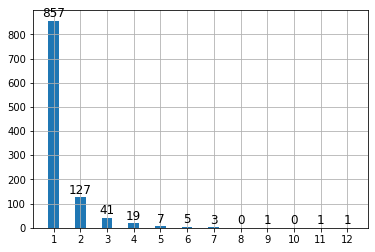

In [104]:
# 统计连板分布
headers = ['code', 'name', 'ind', 'info', 'pctcount', 'ndays']
df = pandas.read_csv('quant_select_stock_cts10_1_30_cts10_1_30_2022-01-14.csv', header=None, skiprows=1, skipfooter=1)
df.set_axis(axis=1, labels=['code', 'name', 'ind', 'info', 'pctcount', 'ndays'], inplace=True)
df['pctcount'] = pd.to_numeric(df['pctcount'])
df = df.sort_values(by='pctcount', ascending=False)
print(df)

print(max(df['pctcount']))
pcmax = max(df['pctcount'])
pc = [df[df['pctcount'] <= i].shape[0] for i in range(1, pcmax + 1)]
print(pc)
newpc = []
for i in range(len(pc)):
    if i > 0:
        p = pc[i] - pc[i - 1]
    else:
        p = pc[i]
    newpc.append(p)
pc = newpc
print(pc)

import matplotlib.pyplot as plt

plt.figure(facecolor='white')
# plt.hist(df['pctcount'], bins=12)


plt.bar(range(1, len(pc) + 1), pc, width=0.4)
plt.xticks(range(1, len(pc) + 1))
for x1, y1 in enumerate(pc):
    plt.text(x1 + 1, y1 + 15, y1, ha='center', fontsize=12)
plt.grid()
plt.show()



In [31]:
import pandas

df = pandas.read_pickle('../rawdata/sz.002046.pkl')
pcts = df['pctChg'].dropna().values[-20:]
print(pcts)


[-4.45  1.7  -0.74 -1.87 -1.08 -1.54 -2.41  3.81 -2.47  0.32 -1.36 -0.54
 -3.31  6.92 -2.55 -0.4   0.27 -6.65 -7.12  0.62]


C:\Users\K\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


[720, 988, 2046, 2139, 2201, 2544, 2595, 2667, 2922, 3009, 300118, 300223, 300323, 300454, 300457, 300474, 300490, 300581, 300617, 300693, 300712, 300861, 600163, 600172, 600210, 600238, 600316, 600399, 600483, 600600, 600702, 600779, 603025, 603185, 603198, 603218, 603324, 603396, 603595, 603693, 605123, 688019, 688037, 688077, 688188, 688356, 688357, 688368, 688408, 688508, 688598]
  500.99 ms in plot_stocks([720, 988, 2046, 2139,..., 'rsi 30')


AttributeError: 'NoneType' object has no attribute 'iloc'

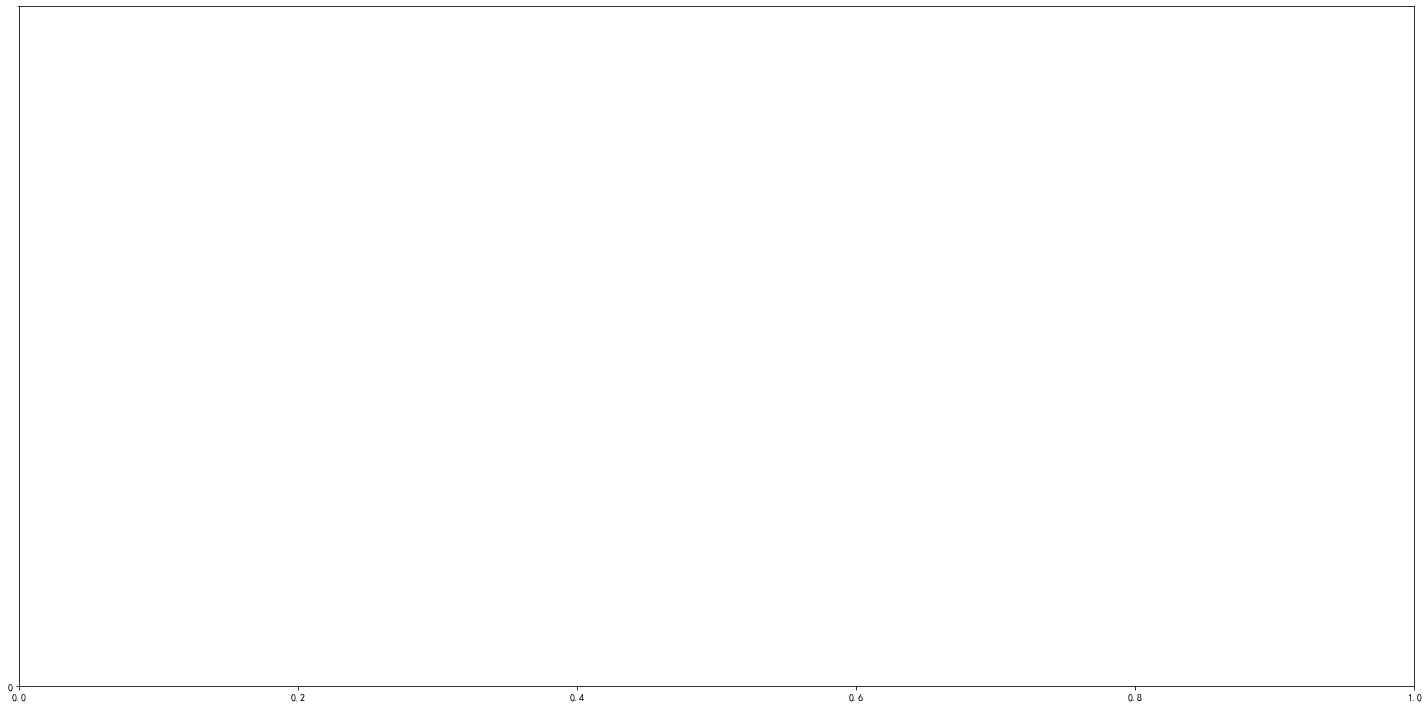

In [11]:
from plot_multi_stocks import *

import pandas

cfg.savepath = r'.'
cfg.algo = 2
cfg.enable_filter = True
cfg.ndays = 60


df = pandas.read_csv('quant_select_stock_rsi_30_rsi_30_2022-01-14.csv', header=None, skiprows=1, skipfooter=1)

stocks = df.iloc[:,0].tolist()

print(stocks)

plot_stocks(stocks, 'rsi 30')











